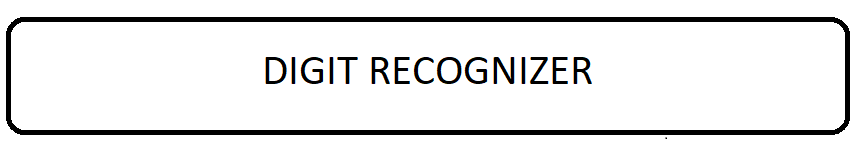                                          

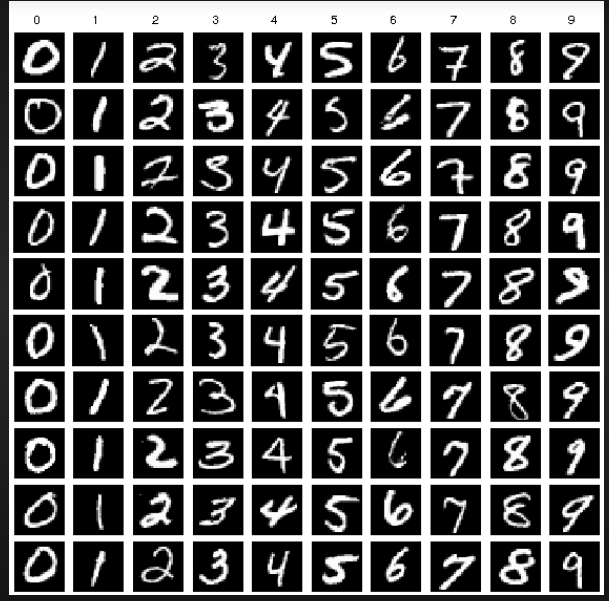

# About dataset

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

# MULTI CLASS CLASSIFICATION MODEL

👉-Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.

👉-Logistic regression, by default, is limited to two-class classification problems. Some extensions like one-vs-rest can allow logistic regression to be used for multi-class classification problems, although they require that the classification problem first be transformed into multiple binary classification problems.

👉-Instead, the multinomial logistic regression algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predict probability distribution to a multinomial probability distribution to natively support multi-class classification problems.

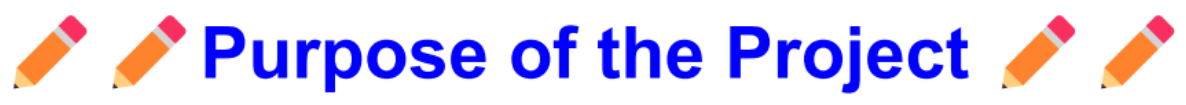

### Exploratory data analysis (EDA) is one of the most significant methods to examine the data we have. In this project, we are going to explore the hidden patterns in the dataset and extract information from them. Model implemented:
### In the dataset, the target variable has 2 possible outcomes/classes. It is a classification problem.
#### 🎯 Multi class Logistic Regression
#### 🎯 Decision Tree Classifier
#### 🎯 Bagging Classifier
#### 🎯 Support Vector Machine

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Loading and Reading Dataset

In [2]:
test=pd.read_csv('MNISTtest.csv')
train=pd.read_csv('MNISTtrain.csv')

In [3]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test['data']='test'
train['data']='train'

In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,data
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test


In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,data
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train


In [8]:
MNIST_df=pd.concat([test,train],axis=0)

In [9]:
MNIST_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,data,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,train,0.0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,train,1.0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,train,7.0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,train,6.0


## Information about the data set

In [10]:
MNIST_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 41999
Columns: 786 entries, pixel0 to label
dtypes: float64(1), int64(784), object(1)
memory usage: 420.3+ MB


# PREPROCESSING:

## 🎯 Checking null values

In [11]:
MNIST_df.isnull().sum()

pixel0          0
pixel1          0
pixel2          0
pixel3          0
pixel4          0
            ...  
pixel781        0
pixel782        0
pixel783        0
data            0
label       28000
Length: 786, dtype: int64

#### 👉-No missing values

## 🎯 ENCODING:

### 👉-No encoding as all data is of type int

### 🎯 Outliers Handling

### 👉-No outliers to handle

## 🎯Imbalance data check

In [12]:
MNIST_df['label'].value_counts()

1.0    4684
7.0    4401
3.0    4351
9.0    4188
2.0    4177
6.0    4137
0.0    4132
4.0    4072
8.0    4063
5.0    3795
Name: label, dtype: int64

### 👉-data is balanced

# 🎯 Binary class Logistic Regression
## 👉-Split the data for Test and Train

In [13]:
train=MNIST_df[MNIST_df['data']=='train']
test=MNIST_df[MNIST_df['data']=='test']

In [14]:
train.drop(['data'],axis=1,inplace=True)
test.drop(['data'],axis=1,inplace=True)

In [15]:
train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0


### 👉-split into independent and dependent variables

In [16]:
x=train.drop(['label'],axis=1)

In [17]:
y=train[['label']]

In [18]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y.head()

,label
0,1.0
1,0.0
2,1.0
3,4.0
4,0.0


## 👉Step1:-split data into train and test for building model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=1,stratify=y)

## 👉-Step-2:- Buiulding Logistic Regression model

In [22]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

## 🎯Approach1:OVR or OVA

In [23]:
logit_ovr=LogisticRegression(multi_class='ovr')
logit_ovr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

## 👉-Step-3: Prediction

In [24]:
y_pred_train_ovr = logit_ovr.predict(x_train)
y_pred_test_ovr = logit_ovr.predict(x_test)

In [25]:
y_pred_train_ovr

array([5., 3., 0., ..., 1., 9., 6.])

In [26]:
y_pred_test_ovr

array([5., 4., 8., ..., 5., 6., 9.])

## 👉-Step-4: Evaluation

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
print('CONFUSION MATRIX')
print('====='*10)
print(confusion_matrix(y_train, y_pred_train_ovr))
print("*********"*5)
print(confusion_matrix(y_test, y_pred_test_ovr))

CONFUSION MATRIX
[[3057    0    1    3    5    5   13    1   12    2]
 [   0 3455   10    7    2    4    5    3   27    0]
 [  12   19 2879   43   26   14   17   28   89    6]
 [   5    4   65 2987    5   66    8   18   68   37]
 [   4   10   21    5 2878    4   15    7   33   77]
 [  21    6   19   98   17 2497   41    4  103   40]
 [  16    0    9    0    7   33 3015    1   22    0]
 [   5    8   34    5   20    3    3 3128    7   88]
 [  17   45   31   67   16   70   16   13 2732   40]
 [  12    8    8   54   62   15    0   85   31 2866]]
*********************************************
[[1003    0    2    3    0    3    8    0   12    2]
 [   2 1131   11    7    0    6    2    1   10    1]
 [  10   14  919   11   14    7   13   20   35    1]
 [   5    4   36  949    0   33    8   14   33    6]
 [   1    5    3    3  932    4    9    5   13   43]
 [  18    2    5   35   10  799   28    7   29   16]
 [  12    2    6    3    5   10  985    2    8    1]
 [   3    4   17    5    7    5    

In [29]:
print('CLASSIFICATION REPORT')
print('====='*10)
print(classification_report(y_train, y_pred_train_ovr))
print("*********"*5)
print(classification_report(y_test, y_pred_test_ovr))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3099
         1.0       0.97      0.98      0.98      3513
         2.0       0.94      0.92      0.93      3133
         3.0       0.91      0.92      0.91      3263
         4.0       0.95      0.94      0.94      3054
         5.0       0.92      0.88      0.90      2846
         6.0       0.96      0.97      0.97      3103
         7.0       0.95      0.95      0.95      3301
         8.0       0.87      0.90      0.89      3047
         9.0       0.91      0.91      0.91      3141

    accuracy                           0.94     31500
   macro avg       0.94      0.94      0.94     31500
weighted avg       0.94      0.94      0.94     31500

*********************************************
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1033
         1.0       0.96      0.97      0.96      1171
         2

In [30]:
print('ACCURACY SCORE')
print('====='*10)
print(accuracy_score(y_train, y_pred_train_ovr))
print("*********"*5)
print(accuracy_score(y_test, y_pred_test_ovr))

ACCURACY SCORE
0.9363174603174603
*********************************************
0.9078095238095238


## Accuracy of train and test data through Regression model
#### 👉accuracy_score_train: 94%
#### 👉accuracy_score_test: 91%

## 👉Step-5: Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_ovr, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit_ovr, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())

Train Accuracy [0.90063492 0.90730159 0.90857143 0.90984127 0.90126984 0.91365079
 0.91047619 0.91079365 0.9015873  0.90571429]

Train Mean Accuracy 0.906984126984127

Train Max Accuracy 0.9136507936507936

Test Accuracy [0.85714286 0.8552381  0.87714286 0.85047619 0.84571429 0.87619048
 0.87714286 0.87714286 0.85714286 0.8752381 ]

Test Mean Accuracy 0.8648571428571428

Test Max Accuracy 0.8771428571428571


## Accuracy of train and test data by Cross validation
### 👉training_accuracy mean: 86%
### 👉testing_accuracy mean: 87%

## 🎯Approach2:MULTINOMIAL Approach

In [32]:
logit_multi = LogisticRegression(multi_class='multinomial')
logit_multi.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

## 👉-Step-2: Prediction

In [33]:
y_pred_train_multi = logit_multi.predict(x_train)
y_pred_test_multi = logit_multi.predict(x_test)

## 👉-Step-3: Evaluation

In [34]:
print('CONFUSION MATRIX')
print('====='*10)
print(confusion_matrix(y_train, y_pred_train_multi))
print("*********"*5)
print(confusion_matrix(y_test, y_pred_test_multi))

CONFUSION MATRIX
[[3033    0    5    5    6   13   19    4   12    2]
 [   0 3446   11    9    2    8    4    5   24    4]
 [   7   23 2900   39   30   13   20   23   62   16]
 [   8    8   55 2992    1   88    6   24   53   28]
 [   7    9   16    3 2903    3   18    9   17   69]
 [  25    5   22   77   21 2564   32    2   76   22]
 [  14    3   12    1   12   31 3018    2   10    0]
 [   2    8   28    9   12    2    2 3139   10   89]
 [  17   32   26   62    9   72   18    9 2773   29]
 [  12    8    5   36   63   12    0   78   16 2911]]
*********************************************
[[1000    0    5    2    2    8    7    1    7    1]
 [   0 1139    7    6    0    5    1    2    7    4]
 [   6   11  926   19    9    8   17   15   27    6]
 [   3    4   38  941    0   48    6   12   27    9]
 [   0    4    5    3  939    1   11    6    9   40]
 [  11    2    9   30   11  827   21    5   22   11]
 [  10    3    7    3   10   10  985    1    3    2]
 [   3    2   16    8    7    3    

In [35]:
print('CLASSIFICATION REPORT')
print('====='*10)
print(classification_report(y_train, y_pred_train_multi))
print("*********"*5)
print(classification_report(y_test, y_pred_test_multi))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      3099
         1.0       0.97      0.98      0.98      3513
         2.0       0.94      0.93      0.93      3133
         3.0       0.93      0.92      0.92      3263
         4.0       0.95      0.95      0.95      3054
         5.0       0.91      0.90      0.91      2846
         6.0       0.96      0.97      0.97      3103
         7.0       0.95      0.95      0.95      3301
         8.0       0.91      0.91      0.91      3047
         9.0       0.92      0.93      0.92      3141

    accuracy                           0.94     31500
   macro avg       0.94      0.94      0.94     31500
weighted avg       0.94      0.94      0.94     31500

*********************************************
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1033
         1.0       0.96      0.97      0.97      1171
         2

In [36]:
print('ACCURACY SCORE')
print('====='*10)
print(accuracy_score(y_train, y_pred_train_multi))
print("*********"*5)
print(accuracy_score(y_test, y_pred_test_multi))

ACCURACY SCORE
0.9421904761904762
*********************************************
0.9132380952380953


## Accuracy of train and test data through Regression model
### 👉accuracy_score_train: 94%
### 👉accuracy_score_test: 91%

In [108]:
multi_acc_train=accuracy_score(y_train, y_pred_train_multi)
multi_acc=accuracy_score(y_test, y_pred_test_multi)

### 👉Step-4: Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_multi, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit_multi, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())

Train Accuracy [0.90920635 0.91111111 0.91174603 0.90984127 0.90666667 0.92
 0.90984127 0.91809524 0.91269841 0.91460317]

Train Mean Accuracy 0.9123809523809523

Train Max Accuracy 0.92

Test Accuracy [0.87333333 0.87619048 0.87047619 0.85714286 0.87047619 0.88095238
 0.88857143 0.89142857 0.87904762 0.89333333]

Test Mean Accuracy 0.878095238095238

Test Max Accuracy 0.8933333333333333


## Accuracy of train and test data by Cross validation
### 👉training_accuracy mean: 91%
### 👉testing_accuracy mean: 88%

In [38]:
#predict and submit

In [39]:
test.drop(['label'],axis=1,inplace=True)

In [40]:
final=logit_multi.predict(test)

In [41]:
final_df=pd.DataFrame(final)

In [42]:
final_df

,0
0,2.0
1,0.0
2,9.0
3,7.0
4,3.0
...,...
27995,9.0
27996,7.0
27997,3.0
27998,9.0


In [43]:
final_1=pd.read_csv('MNISTtest.csv')

In [44]:
final_report=pd.concat([final_1,final_df],axis=1)

In [45]:
final_report

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [46]:
final_report=final_report.rename(columns={0:'label'})

In [47]:
final_report

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [48]:
final_report.to_csv('MNIST_REPORT.csv')

# Summary of my Logistic Model
### Based on the provided training and testing results, along with the AUC-ROC curve analysis, let's interpret the performance of the logistic regression model:
#### Training and Testing Accuracy (after cross validation):
#### Training Accuracy Score: Approximately 94%
#### Test Accuracy Score: Approximately 91%

### Interpretation: 
- The model achieves an accuracy of approximately 94% on the training data and 91% on the testing data. This indicates that the model performs reasonably well in predicting the correct class labels for both datasets. There is a scope for improvement.
## Overall Interpretation:
- The logistic regression model shows a reasonably good performance, with accuracy scores of
around 94% on the training data and 91% on the testing data even after cross validation
- The classification report indicates that the model performs better in identifying negative cases
(0) compared to positive cases (1) for both the training and testing datasets. There is imbalancy
between Recall, precision and F1 score

# 🎯DECISION TREE

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred_train_dt=dtree.predict(x_train)
y_pred_test_dt=dtree.predict(x_test)

In [51]:
y_pred_train_dt

array([5., 3., 0., ..., 1., 9., 6.])

In [52]:
y_pred_test_dt

array([9., 4., 8., ..., 3., 6., 9.])

In [53]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_train_dt))
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_test_dt))
print('classification_report_train:',classification_report(y_train,y_pred_train_dt))
print('classification_report_test:',classification_report(y_test,y_pred_test_dt))

print('accuracy_score_train:',accuracy_score(y_train,y_pred_train_dt))
print('accuracy_score_test:',accuracy_score(y_test,y_pred_test_dt))

Confusion_matrix_train: [[3099    0    0    0    0    0    0    0    0    0]
 [   0 3513    0    0    0    0    0    0    0    0]
 [   0    0 3133    0    0    0    0    0    0    0]
 [   0    0    0 3263    0    0    0    0    0    0]
 [   0    0    0    0 3054    0    0    0    0    0]
 [   0    0    0    0    0 2846    0    0    0    0]
 [   0    0    0    0    0    0 3103    0    0    0]
 [   0    0    0    0    0    0    0 3301    0    0]
 [   0    0    0    0    0    0    0    0 3047    0]
 [   0    0    0    0    0    0    0    0    0 3141]]
Confusion_matrix_test: [[ 938    1   15   13    8   16   15    5   11   11]
 [   0 1102    9   16    3    6    7    8   16    4]
 [  17   17  869   31   13    9   23   24   32    9]
 [   8   20   54  861    6   57    6   15   42   19]
 [   5    5   11    4  862   17   18   10   21   65]
 [  13    6   14   54   13  755   20   11   31   32]
 [  23    7   12    7   15   31  910    4   20    5]
 [   6    8   31    8   16    5    8  981    6   31

## Feature Importance Variable

In [54]:
dtree.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.97115335e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.98267378e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [55]:
pd.DataFrame(index=x.columns, data=dtree.feature_importances_, columns=['Feature Importance'])

,Feature Importance
pixel0,0.0
pixel1,0.0
pixel2,0.0
pixel3,0.0
pixel4,0.0
...,...
pixel779,0.0
pixel780,0.0
pixel781,0.0
pixel782,0.0


## 🎯Hyper parameter tunning

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree_prun=DecisionTreeClassifier(max_depth=6)
dtree_prun.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [57]:
y_pred_train_dt_prun=dtree_prun.predict(x_train)
y_pred_test_dt_prun=dtree_prun.predict(x_test)

In [58]:
y_pred_train_dt_prun

array([3., 3., 0., ..., 1., 9., 2.])

In [59]:
y_pred_test_dt_prun

array([9., 4., 8., ..., 0., 6., 9.])

In [60]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_train_dt_prun))
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_test_dt_prun))
print('classification_report_train:',classification_report(y_train,y_pred_train_dt_prun))
print('classification_report_test:',classification_report(y_test,y_pred_test_dt_prun))

print('accuracy_score_train:',accuracy_score(y_train,y_pred_train_dt_prun))
print('accuracy_score_test:',accuracy_score(y_test,y_pred_test_dt_prun))

Confusion_matrix_train: [[2650   25   84   67   11   49   33   52  110   18]
 [   4 2878   87  121  146   15    8   59  148   47]
 [  34   62 2182  191   48   47   97  112  247  113]
 [ 177   45  110 2049   61  192   30   67  198  334]
 [  16   14  120   27 2234   72   31   12  124  404]
 [  66   37  125  369   90 1512   96   67  261  223]
 [  54    9  123   38  211   60 2479   11   83   35]
 [  19   38   45   40   78   10    9 2661   34  367]
 [ 129  137  171  231   50  108   50   25 1955  191]
 [  65    9   54   53  153   38   13   42   82 2632]]
Confusion_matrix_test: [[872   6  27  32   5  21  13  10  34  13]
 [  1 951  33  45  42   7   1  20  56  15]
 [ 19  14 738  69  18  16  34  36  74  26]
 [ 68  16  48 625  21  67  11  21  72 139]
 [  6   3  45  12 731  19  10   6  46 140]
 [ 31  13  39 123  36 488  42  23  65  89]
 [ 18   4  48  13  77  16 820   3  27   8]
 [ 13  14  14  15  28   6   4 880  16 110]
 [ 32  47  57  68  21  49  18   7 655  62]
 [ 17   4  23  20  53  16   8  17  

## 🎯Plotting Decision Tree after Hyper parameter tunning

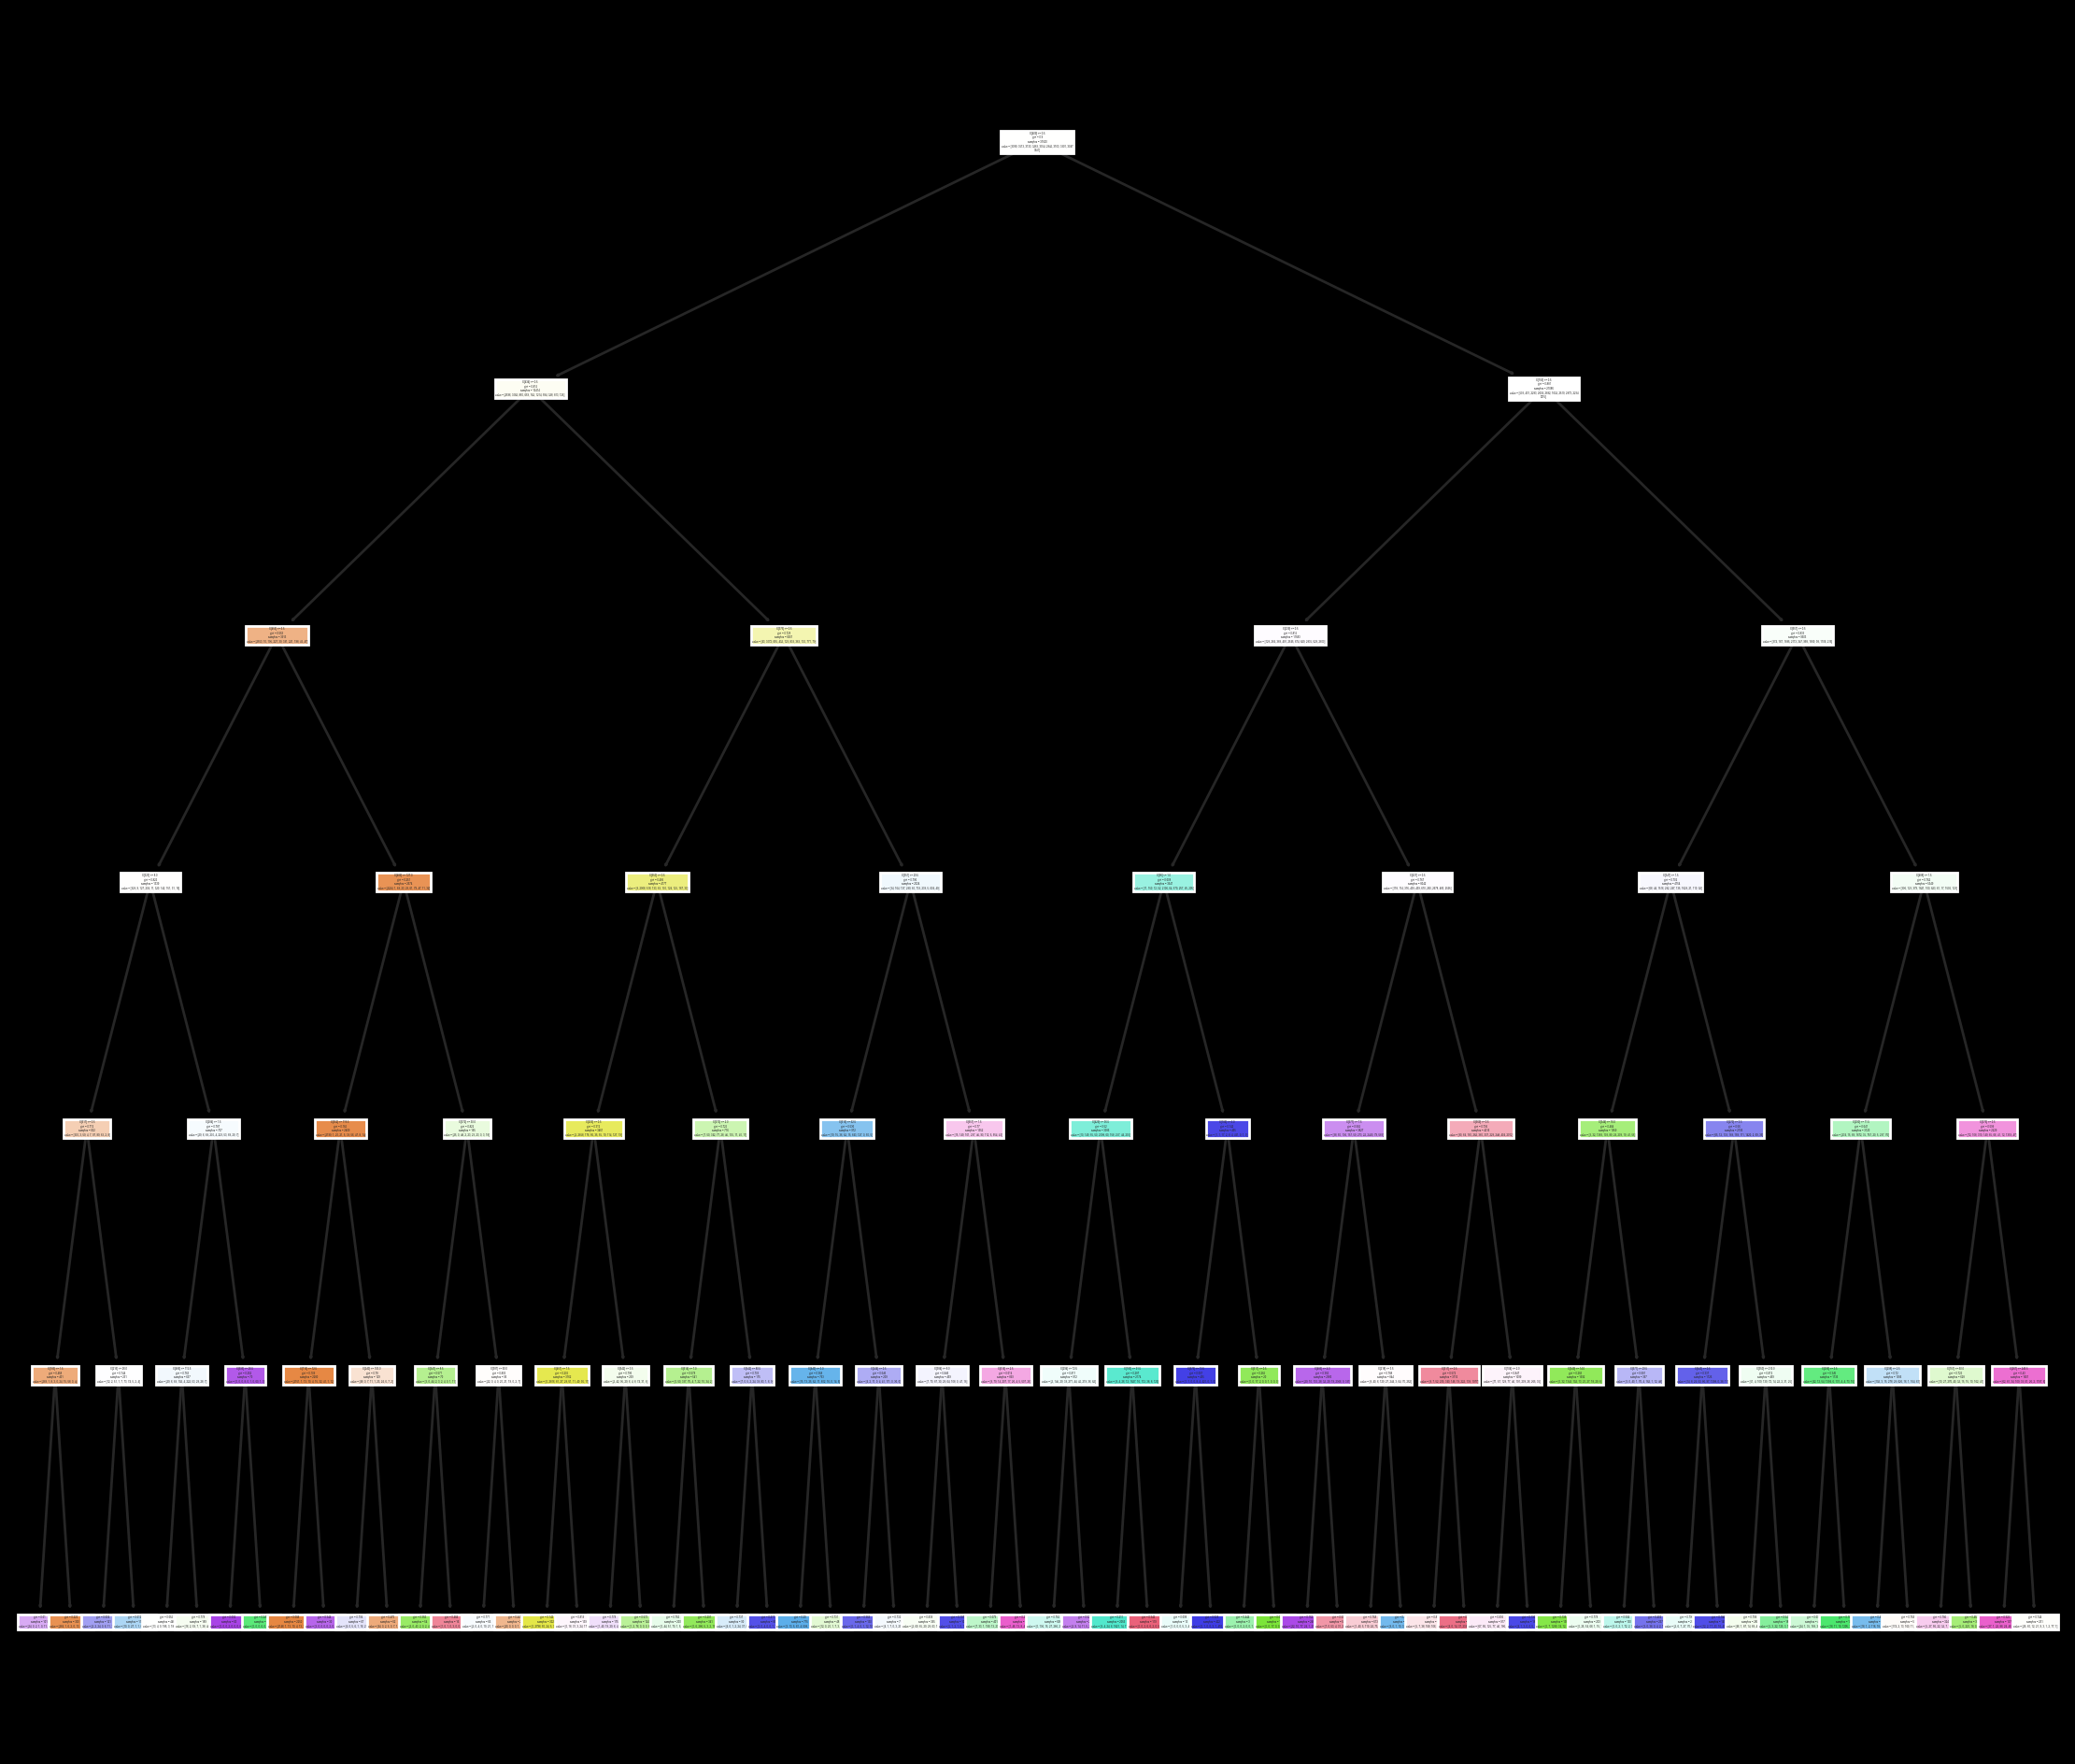

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,12),facecolor ='black',dpi=200)
plot_tree(dtree_prun,filled=True)
plt.show()

## 👉Entropy as criterion:

In [62]:
dtree_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=6)
dtree_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [63]:
y_pred_train_dt_entropy=dtree_entropy.predict(x_train)
y_pred_test_dt_entropy=dtree_entropy.predict(x_test)

In [64]:
y_pred_train_dt_entropy

array([5., 8., 0., ..., 1., 9., 9.])

In [65]:
y_pred_test_dt_entropy

array([5., 4., 8., ..., 8., 6., 9.])

In [66]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_train_dt_entropy))
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_test_dt_entropy))
print('classification_report_train:',classification_report(y_train,y_pred_train_dt_entropy))
print('classification_report_test:',classification_report(y_test,y_pred_test_dt_entropy))

print('accuracy_score_train:',accuracy_score(y_train,y_pred_train_dt_entropy))
print('accuracy_score_test:',accuracy_score(y_test,y_pred_test_dt_entropy))

Confusion_matrix_train: [[2789    3   36   37    9   74   50   23   68   10]
 [   1 3202   44   50    5   14   50   63   17   67]
 [  76   51 2235   47   54   42  162  276  161   29]
 [  33   69  130 2164  129  413   37   67  140   81]
 [  11   23   62   54 2326   26  123   18   68  343]
 [  86   37  109  261  101 1937  121   34  118   42]
 [  59   30  135   18  158   84 2460   10  124   25]
 [  10   78  155   12  123   14   12 2627   89  181]
 [   6  256   97   96  145   78   73   10 2194   92]
 [  22   72   36  227  282   58   29   92   53 2270]]
Confusion_matrix_test: [[ 915    0   13   14    2   34   13    9   25    8]
 [   0 1060   14   21    5    7   20   21    3   20]
 [  28   15  737   22   11   19   57   89   56   10]
 [  15   20   56  680   36  160   18   23   52   28]
 [   4    3   29   15  750    8   42   16   26  125]
 [  31   14   36   73   33  625   53   16   46   22]
 [  16   13   42    6   51   28  830    5   33   10]
 [   5   16   44    7   43    7    2  888   29   59

In [67]:
print('Accuracy of the Train data before Hyper Tuning :',accuracy_score(y_train,y_pred_train_dt))
print('===============================================================================================')
print('Accuracy of the Test data before Hyper Tuning :',accuracy_score(y_test,y_pred_test_dt))
print('===============================================================================================')
print('Accuracy of the Train data after Hyper Tuning :',accuracy_score(y_train,y_pred_train_dt_prun))
print('===============================================================================================')
print('Accuracy of the Test data after Hyper Tuning:',accuracy_score(y_test,y_pred_test_dt_prun))
print('===============================================================================================')      
print('Accuracy of the Train data after Hyper Tuning as entropy as criterion:',accuracy_score(y_train,y_pred_train_dt_entropy))
print('===============================================================================================')
print('Accuracy of the Test data after Hyper Tuning as entropy as criterion:',accuracy_score(y_test,y_pred_test_dt_entropy))

Accuracy of the Train data before Hyper Tuning : 1.0
Accuracy of the Test data before Hyper Tuning : 0.8518095238095238
Accuracy of the Train data after Hyper Tuning : 0.7375238095238095
Accuracy of the Test data after Hyper Tuning: 0.7259047619047619
Accuracy of the Train data after Hyper Tuning as entropy as criterion: 0.7683809523809524
Accuracy of the Test data after Hyper Tuning as entropy as criterion: 0.7565714285714286


In [110]:
dtree_acc=accuracy_score(y_test, y_pred_test_dt_entropy)
dtree_acc_train=accuracy_score(y_train, y_pred_train_dt_entropy)

# 🎯BaggingClassifier

In [68]:
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier()
bagging.fit(x_train,y_train)

BaggingClassifier()

In [69]:
y_pred_bagg_train=bagging.predict(x_train)
y_pred_bagg_test=bagging.predict(x_test)

In [70]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_bagg_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_bagg_test))
print("================================================================================================================")
print('classification_report_train:',classification_report(y_train,y_pred_bagg_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_bagg_test))
print("================================================================================================================")
print('accuracy_score_train:',accuracy_score(y_train,y_pred_bagg_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_bagg_test))


Confusion_matrix_train: [[3097    0    0    0    1    0    1    0    0    0]
 [   0 3511    0    0    0    0    0    1    1    0]
 [   1    1 3131    0    0    0    0    0    0    0]
 [   1    0    3 3253    0    1    2    0    2    1]
 [   0    2    1    0 3044    0    0    0    1    6]
 [   3    0    0    1    0 2835    5    0    1    1]
 [   1    1    1    0    2    2 3095    0    1    0]
 [   0    1    5    0    0    0    0 3294    1    0]
 [   0    4    0    5    1    3    1    0 3032    1]
 [   2    0    1    4    3    1    0    5    4 3121]]

Confusion_matrix_test: [[ 978    3    7    3    5    9    9    3   11    5]
 [   0 1135   11   11    2    2    1    3    5    1]
 [  21    9  934   21    8    5    9   19   16    2]
 [   9    9   49  929    6   35    3   14   25    9]
 [   3    6    4    3  930    3    7    7   12   43]
 [  14    4    6   41   12  824   19    5   10   14]
 [  20    4   11    2   10   23  951    0   11    2]
 [  10    7   27    5    6    5    0 1011    9   2

### 📌Accuracy of train data by BaggingClassifier:99%
### 📌Accuracy of train data by BaggingClassifier tree:80%¶

In [111]:
bagg_acc=accuracy_score(y_test,y_pred_bagg_test)
bagg_acc_train=accuracy_score(y_train,y_pred_bagg_train)

In [72]:
bagging.estimators_

[DecisionTreeClassifier(random_state=1446397746),
 DecisionTreeClassifier(random_state=1172501131),
 DecisionTreeClassifier(random_state=1249058842),
 DecisionTreeClassifier(random_state=883520247),
 DecisionTreeClassifier(random_state=527162813),
 DecisionTreeClassifier(random_state=872078130),
 DecisionTreeClassifier(random_state=209878595),
 DecisionTreeClassifier(random_state=1289713786),
 DecisionTreeClassifier(random_state=1350339489),
 DecisionTreeClassifier(random_state=1734267703)]

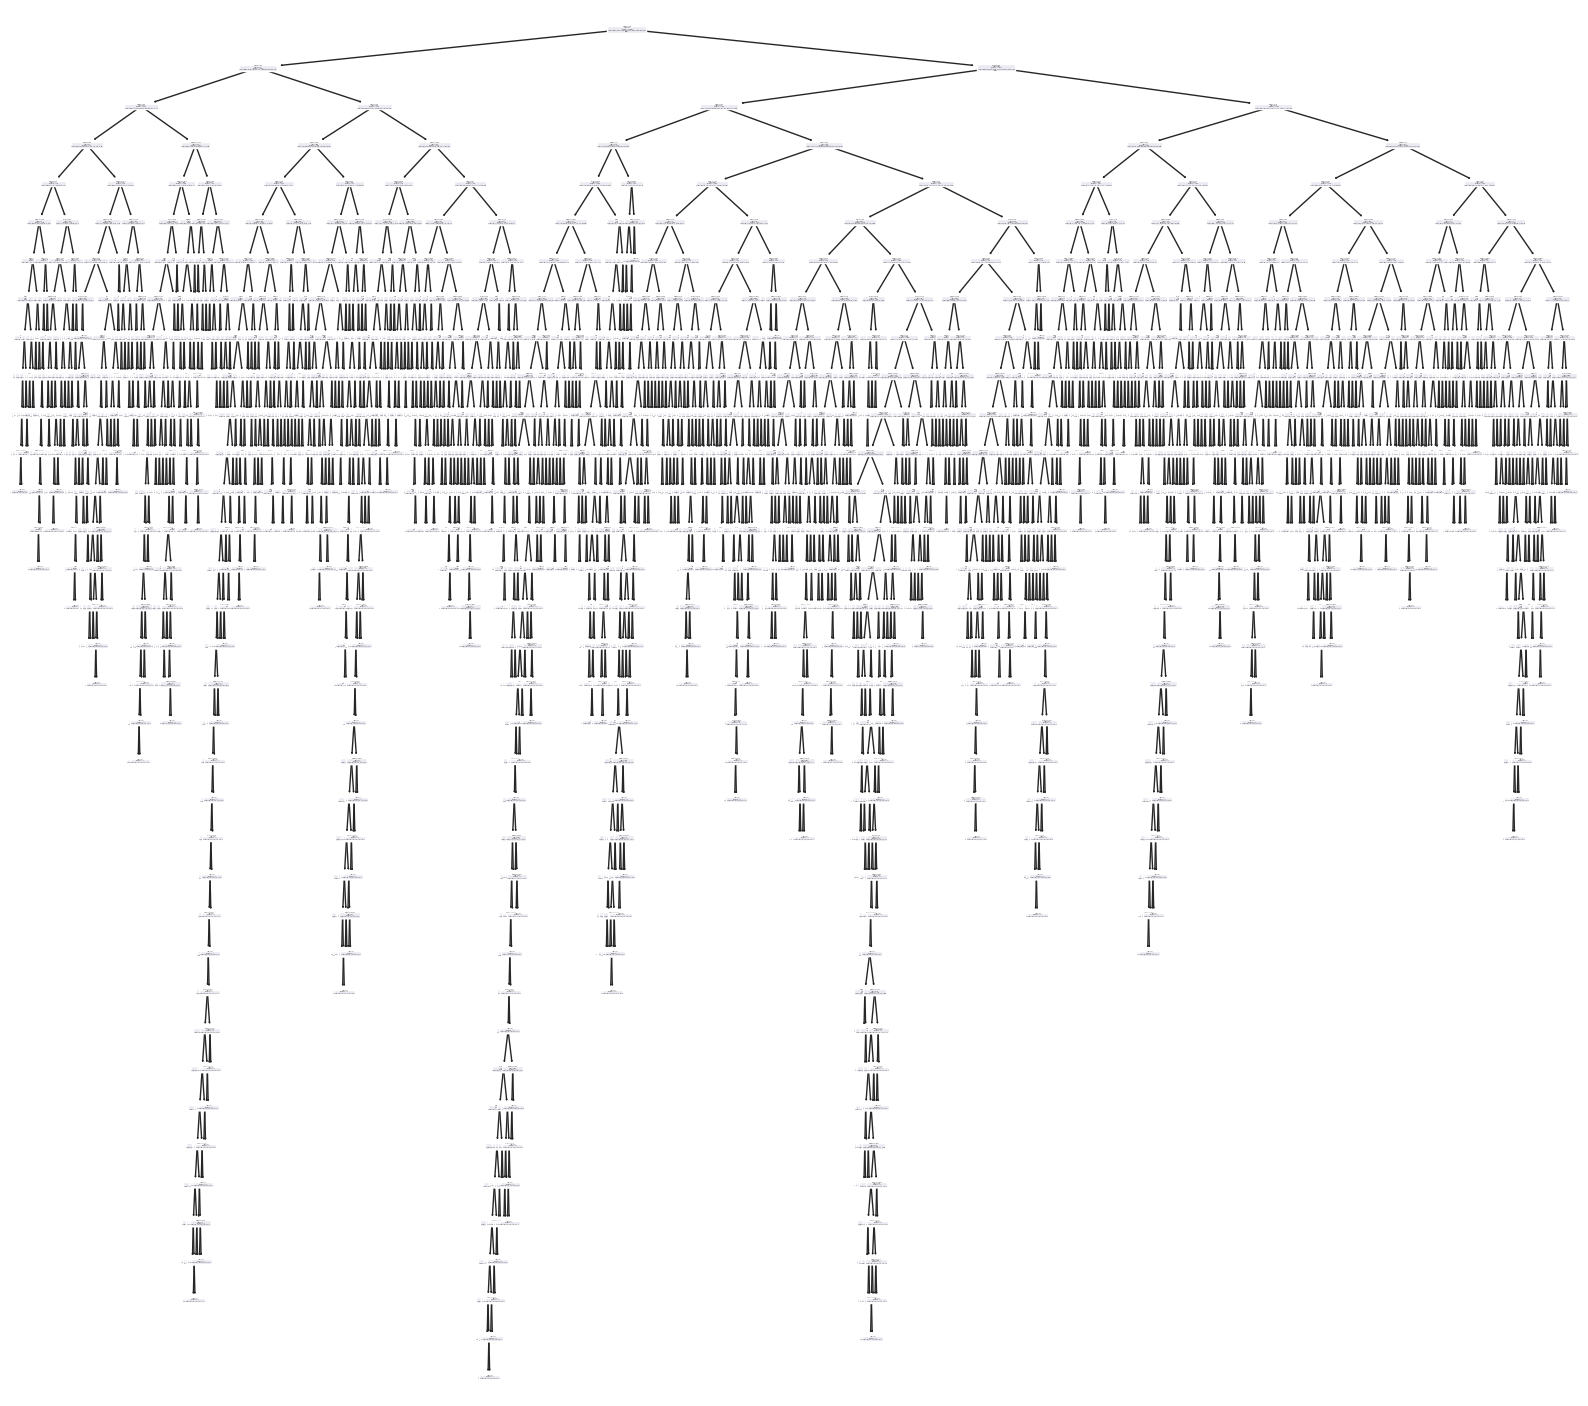

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,18))
plot_tree(bagging.estimators_[0])
plt.show()

# 🎯RandomForest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_cl=RandomForestClassifier()
rf_cl.fit(x_train,y_train) 

RandomForestClassifier()

In [79]:
y_pred_train_rf=rf_cl.predict(x_train)
y_pred_test_rf=rf_cl.predict(x_test)

In [80]:
y_pred_train_rf

array([5., 3., 0., ..., 1., 9., 6.])

In [81]:
y_pred_test_rf

array([5., 4., 8., ..., 5., 6., 9.])

In [82]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_train_rf))
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_test_rf))
print('classification_report_train:',classification_report(y_train,y_pred_train_rf))
print('classification_report_test:',classification_report(y_test,y_pred_test_rf))

print('accuracy_score_train:',accuracy_score(y_train,y_pred_train_rf))
print('accuracy_score_test:',accuracy_score(y_test,y_pred_test_rf))

Confusion_matrix_train: [[3099    0    0    0    0    0    0    0    0    0]
 [   0 3513    0    0    0    0    0    0    0    0]
 [   0    0 3133    0    0    0    0    0    0    0]
 [   0    0    0 3263    0    0    0    0    0    0]
 [   0    0    0    0 3054    0    0    0    0    0]
 [   0    0    0    0    0 2846    0    0    0    0]
 [   0    0    0    0    0    0 3103    0    0    0]
 [   0    0    0    0    0    0    0 3301    0    0]
 [   0    0    0    0    0    0    0    0 3047    0]
 [   0    0    0    0    0    0    0    0    0 3141]]
Confusion_matrix_test: [[1017    0    1    0    0    1    3    1    7    3]
 [   0 1152    7    6    2    1    0    1    1    1]
 [   6    0 1005    9    3    0    4    9    5    3]
 [   1    1   26 1019    0   10    5    7   15    4]
 [   2    0    0    0  979    1    5    3    3   25]
 [   8    3    4   14    3  895    6    3    7    6]
 [   8    1    1    0    2    3 1018    0    1    0]
 [   2    5   13    1    5    0    0 1055    4   15

## 🎯Hyper parameter tunning

In [83]:
rf_cl_prun=RandomForestClassifier(max_depth=6)
rf_cl_prun.fit(x_train,y_train)

RandomForestClassifier(max_depth=6)

In [84]:
y_pred_train_rf_prun=rf_cl_prun.predict(x_train)
y_pred_test_rf_prun=rf_cl_prun.predict(x_test)

In [85]:
y_pred_train_rf_prun

array([3., 3., 0., ..., 1., 9., 2.])

In [86]:
y_pred_test_rf_prun

array([5., 4., 8., ..., 5., 6., 9.])

In [87]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_train_rf_prun))
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_test_rf_prun))
print('classification_report_train:',classification_report(y_train,y_pred_train_rf_prun))
print('classification_report_test:',classification_report(y_test,y_pred_test_rf_prun))

print('accuracy_score_train:',accuracy_score(y_train,y_pred_train_rf_prun))
print('accuracy_score_test:',accuracy_score(y_test,y_pred_test_rf_prun))

Confusion_matrix_train: [[2990    1    4    3    3    6   31    2   58    1]
 [   0 3438   14   12    3    8    8    6   19    5]
 [  20   40 2802   36   37    3   70   71   41   13]
 [  24   44   77 2831    8   75   14   51   67   72]
 [  10    9   12    0 2653    5   54   23   30  258]
 [  55   70    8  197   31 2304   55   11   46   69]
 [  41   29   13    0   30   33 2936    3   18    0]
 [  10   55   83    3   42    0    0 2955   19  134]
 [   8  127   41  118   16   32   39   14 2572   80]
 [  28   20   16   58   97    8    8  125   38 2743]]
Confusion_matrix_test: [[ 999    0    3    1    0    1   10    3   16    0]
 [   0 1142    5    8    1    1    2    7    3    2]
 [   6   13  924   16    7    2   32   27   12    5]
 [   3   20   41  918    3   30   12   20   25   16]
 [   2    5    6    0  873    0   19    7   13   93]
 [  29   22    6   72    9  739   20    8   15   29]
 [  13   13    8    1    9   11  974    2    3    0]
 [   5   17   28    1   14    1    0  982    7   45

In [88]:
print('Accuracy of the Train data before Hyper Tuning by Random Forest :',accuracy_score(y_train,y_pred_train_rf))
print('===============================================================================================')
print('Accuracy of the Test data before Hyper Tuning by Random Forest:',accuracy_score(y_test,y_pred_test_rf))
print('===============================================================================================')
print('Accuracy of the Train data after Hyper Tuning by Random Forest:',accuracy_score(y_train,y_pred_train_rf_prun))
print('===============================================================================================')
print('Accuracy of the Test data after Hyper Tuning by Random Forest:',accuracy_score(y_test,y_pred_test_rf_prun))

Accuracy of the Train data before Hyper Tuning by Random Forest : 1.0
Accuracy of the Test data before Hyper Tuning by Random Forest: 0.9619047619047619
Accuracy of the Train data after Hyper Tuning by Random Forest: 0.896
Accuracy of the Test data after Hyper Tuning by Random Forest: 0.8879047619047619


In [112]:
rf_acc=accuracy_score(y_test,y_pred_test_rf_prun)
rf_acc_train=accuracy_score(y_train,y_pred_train_rf_prun)

#  🎯NAIVE BAYE'S THEOREM:

## Multinomial Naive Baye's :

In [89]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [90]:
y_pred_mnb_train=mnb.predict(x_train)
y_pred_mnb_test=mnb.predict(x_test)

In [91]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_mnb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_mnb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_mnb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_mnb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_mnb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_mnb_test))

Confusion_matrix_train: [[2809    1   14    8    6   43   59    0  156    3]
 [   0 3286   19   22    2   14   17    2  142    9]
 [  35   43 2616   66   35    6  137   27  161    7]
 [  22   51  146 2646    9   71   38   24  160   96]
 [   9    9   22    2 2238    7   62    8  128  569]
 [  74   24   20  349   67 1894   59    5  260   94]
 [  28   50   32    3   17   76 2852    0   45    0]
 [  22   50   22    7   80    2    5 2744  108  261]
 [  16  160   43  154   40  111   23   11 2385  104]
 [  21   22    9   41  220   15    2   87  115 2609]]

Confusion_matrix_test: [[ 937    0    4    5    0   10   16    0   59    2]
 [   0 1087   15    8    0    6    6    0   45    4]
 [  13   11  860   26    7    0   51   10   60    6]
 [   1   22   63  867    1   26   14    9   51   34]
 [   5    4    6    0  762    2   18    2   38  181]
 [  33    9   11  109   17  623   23    6   82   36]
 [  14   21    9    0    8   25  945    0   12    0]
 [   1   20   10    6   18    0    1  894   31  11

In [92]:
print('Accuracy of the Train data Naive Bayes :',accuracy_score(y_train,y_pred_mnb_train))
print('===============================================================================================')
print('Accuracy of the Test data Naive Bayes:',accuracy_score(y_test,y_pred_mnb_test))

Accuracy of the Train data Naive Bayes : 0.8279047619047619
Accuracy of the Test data Naive Bayes: 0.8235238095238095


In [113]:
mnb_acc=accuracy_score(y_test,y_pred_mnb_test)
mnb_acc_train=accuracy_score(y_train,y_pred_mnb_train)

# 🎯K-NEAREST NEIGHBOR:

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
y_test=np.array(y_test)

In [95]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    y_pred_knn_train=knn.predict(x_train)
    y_pred_knn_test=knn.predict(x_test)
    error_rate.append(np.mean(y_test!=y_pred_knn_test))

error_rate

[0.8996344580498866,
 0.8995711927437642,
 0.8996060317460317,
 0.8995921541950114,
 0.8996111201814059,
 0.8995977868480726,
 0.8995924988662132,
 0.8995718820861678,
 0.8995799818594105,
 0.8995572426303855,
 0.899559537414966,
 0.8995487891156463,
 0.8995475283446712,
 0.8995330884353742,
 0.8995415873015873,
 0.8995255419501134,
 0.8995316643990929,
 0.8995191927437641,
 0.8995231746031747,
 0.8995170612244898,
 0.8995137777777777,
 0.899510693877551,
 0.8995069931972789,
 0.8995019863945578,
 0.8995005351473923,
 0.8994966349206349,
 0.8995025487528344,
 0.8994976689342403,
 0.8994904671201814,
 0.899486149659864,
 0.8994849433106576,
 0.899481977324263,
 0.8994816870748299,
 0.8994780045351474,
 0.8994728616780046,
 0.8994710566893424,
 0.8994715283446713,
 0.8994670929705215,
 0.8994591746031746,
 0.8994596734693877,
 0.8994557097505669,
 0.8994567528344671,
 0.8994590385487529,
 0.899451283446712,
 0.8994609977324263,
 0.8994524716553288,
 0.8994529342403628,
 0.899451927437641

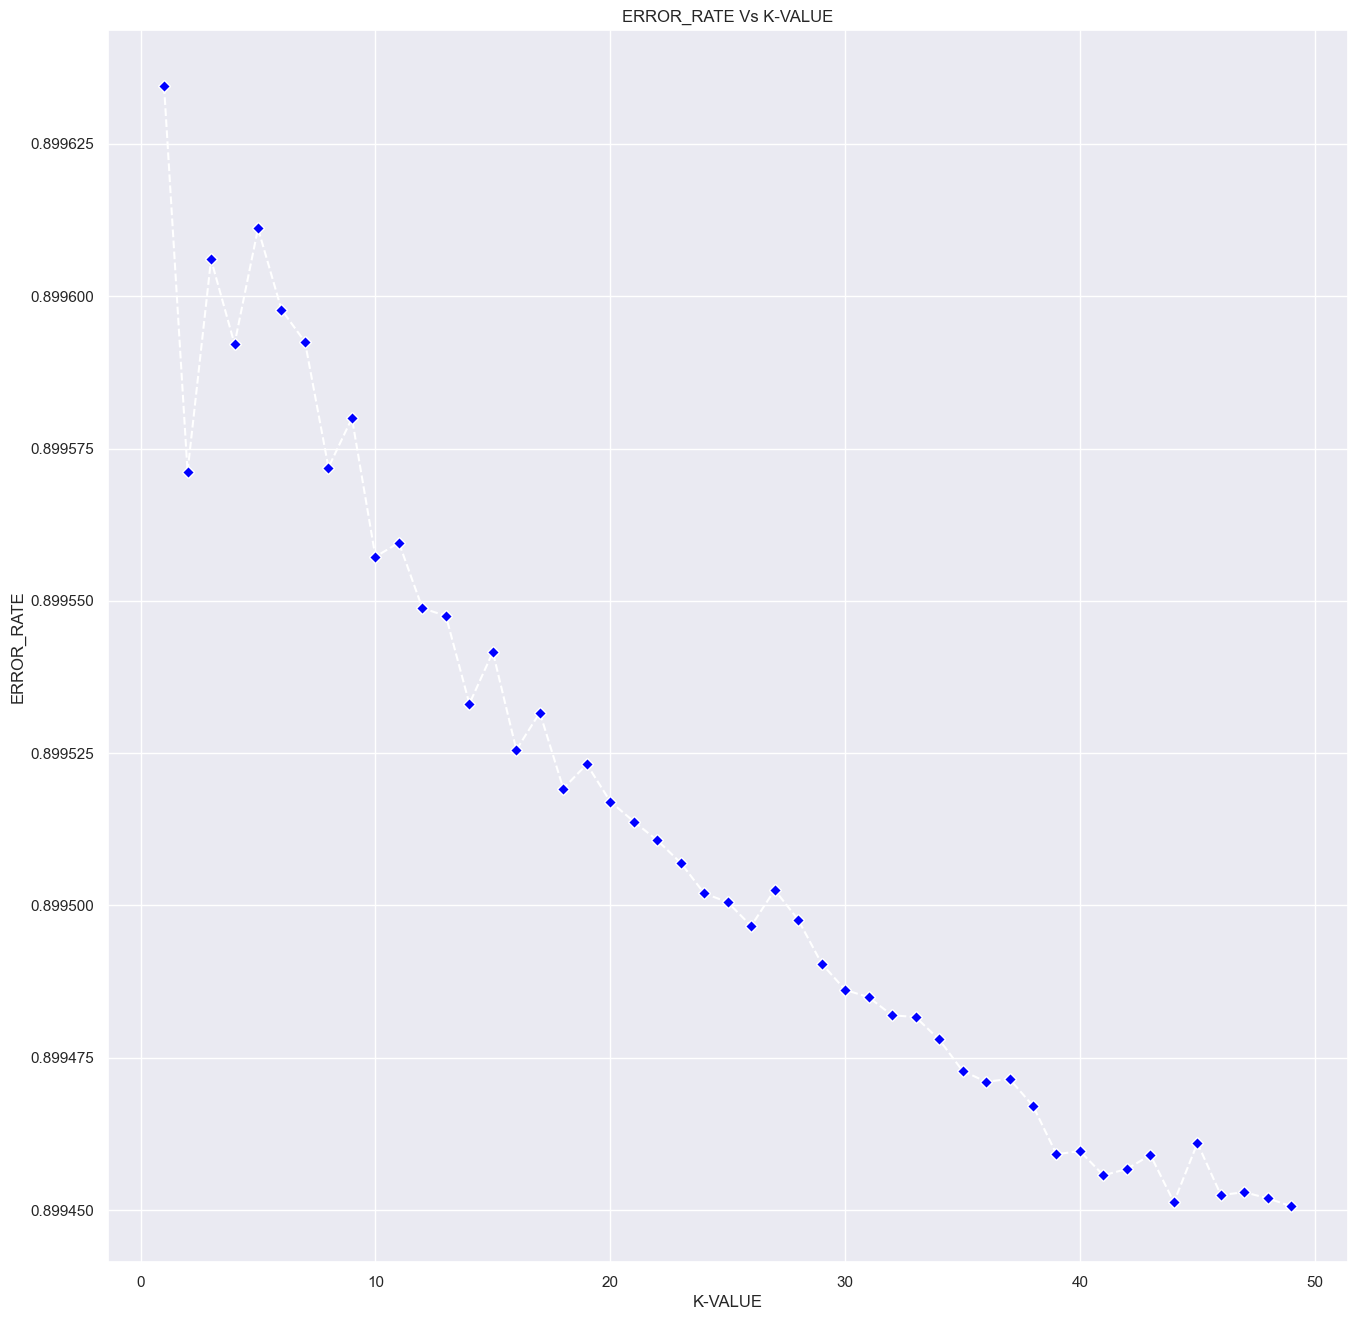

In [96]:
plt.figure(figsize=(16,16))
plt.plot(range(1,50),error_rate,color='white',linestyle='dashed',marker='D',markerfacecolor='blue')
plt.title('ERROR_RATE Vs K-VALUE')
plt.xlabel('K-VALUE')
plt.ylabel('ERROR_RATE')
plt.show()

## 🎯Hyper parameter tuning

In [97]:
knn=KNeighborsClassifier(n_neighbors=47)
knn.fit(x_train,y_train)
y_pred_knn_train=knn.predict(x_train)
y_pred_knn_test=knn.predict(x_test)

In [98]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_knn_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_knn_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_knn_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_knn_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_knn_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_knn_test))

Confusion_matrix_train: [[3061    2    2    0    1    7   23    1    2    0]
 [   0 3489    7    4    4    0    3    3    1    2]
 [  40  109 2817   22    7    8   11   92   18    9]
 [   7   37   12 3078    3   33    6   35   24   28]
 [   2   64    0    0 2850    0   17    7    0  114]
 [  14   21    0   46    6 2679   44    1    5   30]
 [  20   17    0    0    5   20 3040    0    1    0]
 [   3   95    7    0   10    0    0 3131    0   55]
 [  20   85    7   78   13   75   19   17 2663   70]
 [  17   24    5   40   27    5    1   63    4 2955]]

Confusion_matrix_test: [[1023    1    0    0    0    2    5    0    0    2]
 [   0 1164    2    0    2    0    1    2    0    0]
 [  16   33  940    7    1    3    5   33    2    4]
 [   1   14    7 1016    0   17    4   14    8    7]
 [   1   20    0    0  945    0    3    3    0   46]
 [   3   18    1   23    3  867   13    3    2   16]
 [  15    7    0    0    3    6 1002    1    0    0]
 [   1   32    4    0    1    0    0 1041    0   2

### 📌Accuracy of train data by K-NEAREST NEIGHBOR:94%
### 📌Accuracy of test data by K-NEAREST NEIGHBOR:93%

In [114]:
knn_acc=accuracy_score(y_test,y_pred_knn_test)
knn_acc_train=accuracy_score(y_train,y_pred_knn_train)

In [100]:
# 🎯BOOSTING :

In [101]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [102]:
adaboost=AdaBoostClassifier()
adb=adaboost.fit(x_train,y_train)
y_pred_adb_train=adb.predict(x_train)
y_pred_adb_test=adb.predict(x_test)
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_adb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_adb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_adb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_adb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_adb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_adb_test))

Confusion_matrix_train: [[2522    0   19   10    3  284  215    2   21   23]
 [   1 3188   35   23    7   13  110   67   67    2]
 [  61   91 1560   91   68   48  879   86  226   23]
 [ 112   63   40 2316   10  202  140   55  202  123]
 [   6   18  121   43 2203   65   96  103   84  315]
 [ 110   41   30  418   47 1649  301   29  152   69]
 [  32   24  134    8   83   58 2716    3   45    0]
 [  81   60   76    8   92   44    0 2472   42  426]
 [  19  219   61  252   44  108  116   37 2077  114]
 [  26   20   91   84  497   39    1  168   67 2148]]

Confusion_matrix_test: [[ 861    0   10    2    2   91   54    1    9    3]
 [   0 1073   11   12    3    2   34   19   17    0]
 [  33   38  489   38   11   11  294   38   81   11]
 [  38   22   24  773    3   69   39   20   63   37]
 [   2    7   39   12  741   28   25   44   26   94]
 [  35   23    5  127   13  568   95    8   54   21]
 [  10    7   46    3   27   18  909    2   12    0]
 [  31   20   21    5   28   17    0  817   22  13

In [103]:
gdboost=GradientBoostingClassifier()
gdb=gdboost.fit(x_train,y_train)
y_pred_gdb_train=gdb.predict(x_train)
y_pred_gdb_test=gdb.predict(x_test)
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_gdb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_gdb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_gdb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_gdb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_gdb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_gdb_test))

Confusion_matrix_train: [[3075    0    2    2    2    1    4    0   13    0]
 [   0 3482    7    9    3    2    2    4    2    2]
 [   7    7 3024   14   17    2    6   27   23    6]
 [   4    4   28 3112    3   32    1   24   35   20]
 [   4    8    7    0 2971    1   10    3    3   47]
 [   8    4    4   29    6 2751   20    0   16    8]
 [   9    2    1    0    6   25 3043    1   16    0]
 [   4   14   31    8    8    2    1 3188    6   39]
 [   7   12   15   23    7   14    7    5 2933   24]
 [  15    7    2   45   41    7    0   40   16 2968]]

Confusion_matrix_test: [[1007    0    2    4    3    2    2    1   11    1]
 [   0 1146    6    7    3    3    2    2    1    1]
 [  10    3  975    9    9    1    6   12   15    4]
 [   1    5   27  984    3   19    3   12   23   11]
 [   2    3    5    1  958    0    4    4    6   35]
 [   6    8    2   26    9  867   12    4    9    6]
 [   8    0    5    0    4   12 1000    0    5    0]
 [   5    4   11    6    3    3    0 1029    2   3

In [104]:
!pip install Xgboost

In [105]:
from xgboost import XGBClassifier

In [106]:
xgboost=XGBClassifier()
xgb=xgboost.fit(x_train,y_train)
y_pred_xgb_train=xgb.predict(x_train)
y_pred_xgb_test=xgb.predict(x_test)
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_xgb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_xgb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_xgb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_xgb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_xgb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_xgb_test))

Confusion_matrix_train: [[3099    0    0    0    0    0    0    0    0    0]
 [   0 3513    0    0    0    0    0    0    0    0]
 [   0    0 3133    0    0    0    0    0    0    0]
 [   0    0    0 3263    0    0    0    0    0    0]
 [   0    0    0    0 3054    0    0    0    0    0]
 [   0    0    0    0    0 2846    0    0    0    0]
 [   0    0    0    0    0    0 3103    0    0    0]
 [   0    0    0    0    0    0    0 3301    0    0]
 [   0    0    0    0    0    0    0    0 3047    0]
 [   0    0    0    0    0    0    0    0    0 3141]]

Confusion_matrix_test: [[1015    0    3    0    1    3    2    0    7    2]
 [   1 1154    6    3    3    0    0    2    2    0]
 [   2    0 1016    7    1    0    6    6    5    1]
 [   1    2   18 1039    0    7    1    4    9    7]
 [   2    2    1    0  986    0    3    4    3   17]
 [   5    3    2    9    3  909    5    4    5    4]
 [   6    1    2    0    4    3 1015    0    3    0]
 [   3    3   10    4    4    0    0 1063    1   1

### 📌Accuracy of train data by BOOSTING:96%
### 📌Accuracy of test data by BOOSTIG:94%

In [115]:
adb_acc=accuracy_score(y_test,y_pred_adb_test)
adb_acc_train=accuracy_score(y_train,y_pred_adb_train)
gdb_acc=accuracy_score(y_test,y_pred_gdb_test)
gdb_acc_train=accuracy_score(y_train,y_pred_gdb_train)
xgb_acc=accuracy_score(y_test,y_pred_xgb_test)
xgb_acc_train=accuracy_score(y_train,y_pred_xgb_train)

# 🎯SUMMARY

In [117]:
model=['Multi','decisiontree','bagging','randomforest','MultiNB','KNN','AdaBoost','Gradient Boost','XGBOOST']
Test_Accuracy=[multi_acc,dtree_acc,bagg_acc,rf_acc,mnb_acc,knn_acc,adb_acc,gdb_acc,xgb_acc]
Train_Accuracy=[multi_acc_train,dtree_acc_train,bagg_acc_train,rf_acc_train,mnb_acc_train,knn_acc_train,adb_acc_train,gdb_acc_train,xgb_acc_train]


In [118]:
metrics_df=pd.DataFrame({'model_name':model,'Train_Accuracy':Train_Accuracy,'Test_Accuracy':Test_Accuracy})

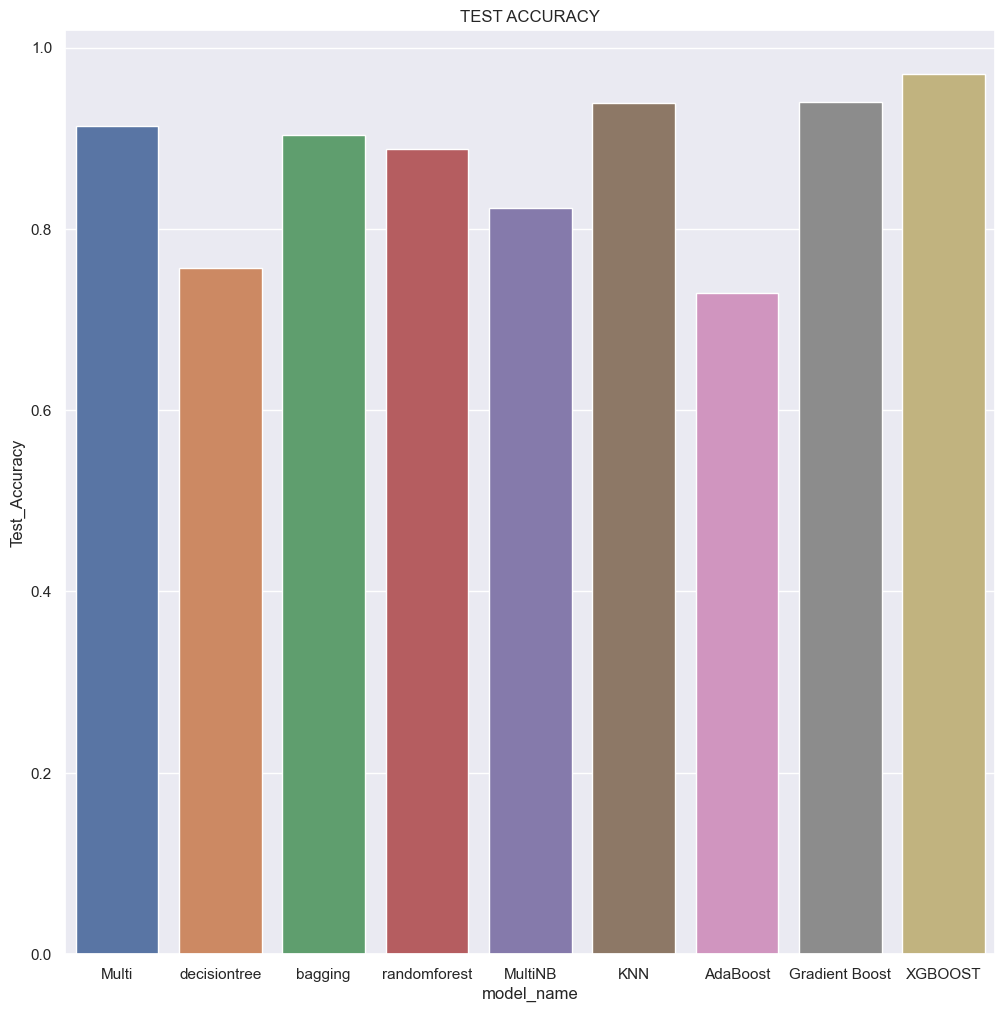

In [119]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Test_Accuracy',data=metrics_df)
plt.title('TEST ACCURACY')
plt.show()

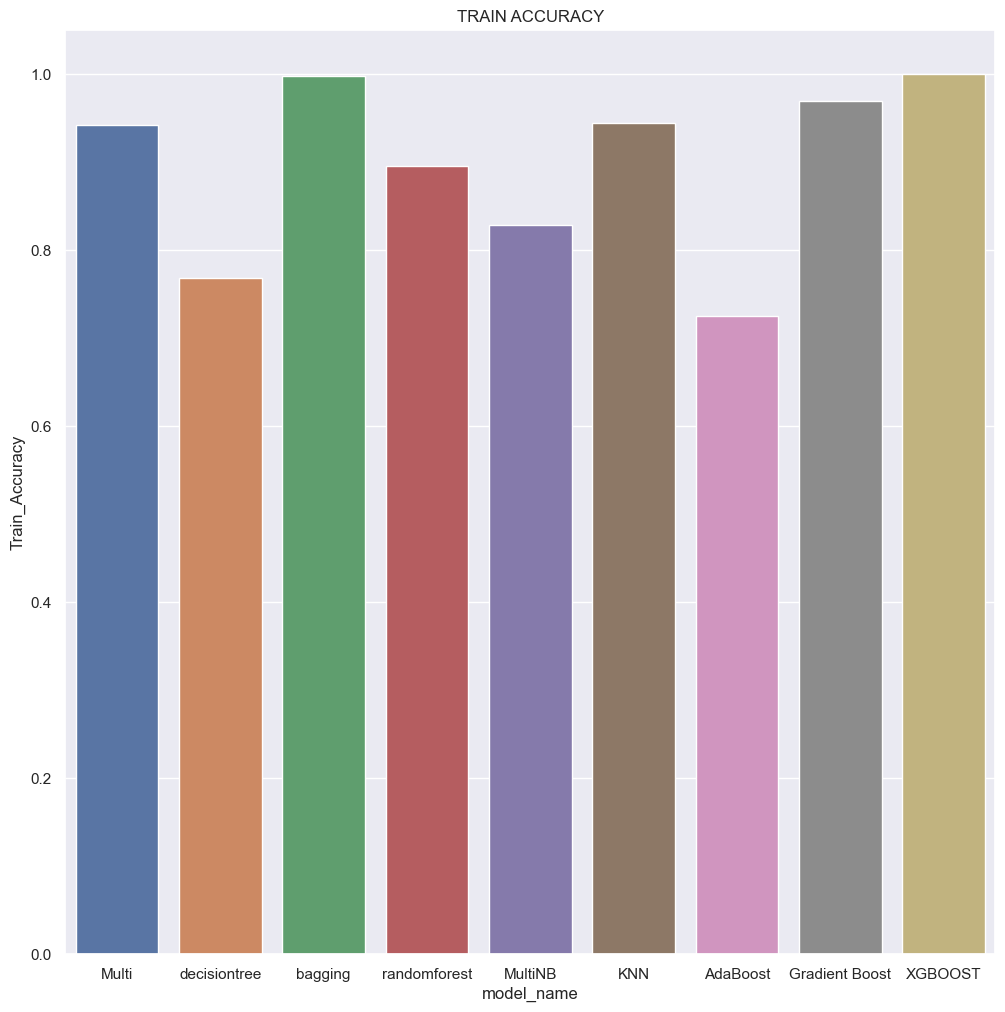

In [120]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Train_Accuracy',data=metrics_df)
plt.title('TRAIN ACCURACY')
plt.show()

In [121]:
metrics_df

,model_name,Train_Accuracy,Test_Accuracy
0,Multi,0.942190,0.913238
1,decisiontree,0.768381,0.756571
2,bagging,0.997238,0.903333
3,randomforest,0.896000,0.887905
4,MultiNB,0.827905,0.823524
5,KNN,0.944857,0.938667
6,AdaBoost,0.725429,0.729524
7,Gradient Boost,0.969746,0.940095
8,XGBOOST,1.000000,0.970762


#### We can observe that Multinomial,Randomforest,KNN,Gradient Boost are delivering good test accuracies and train accuracies

In [123]:
multi_var=abs(multi_acc-multi_acc_train)
knn_var=abs(knn_acc-knn_acc_train)
gdb_var=abs(gdb_acc-gdb_acc_train)
rf_var=abs(rf_acc-rf_acc_train)